## Importing Necessary Libraries

In [44]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Data Preparation

In [45]:
dataset = pd.read_csv("framingham.csv")

In [46]:
print(dataset.shape)
print(dataset.isnull().sum())

(4240, 16)
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [47]:
dataset.drop(["education"], inplace=True, axis=1)
dataset.dropna(axis=0, inplace=True)
dataset.rename(columns={"male":"sex_male"}, inplace=True)

In [48]:
print(dataset.shape)
dataset.head()

(3751, 15)


,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Splitting the Dataset into Test and Train Sets

In [49]:
X = np.asarray(dataset.iloc[:, :-1])
y = np.asarray(dataset.iloc[:, -1])

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


In [50]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Exploratory Data Analysis of Heart Disease Dataset

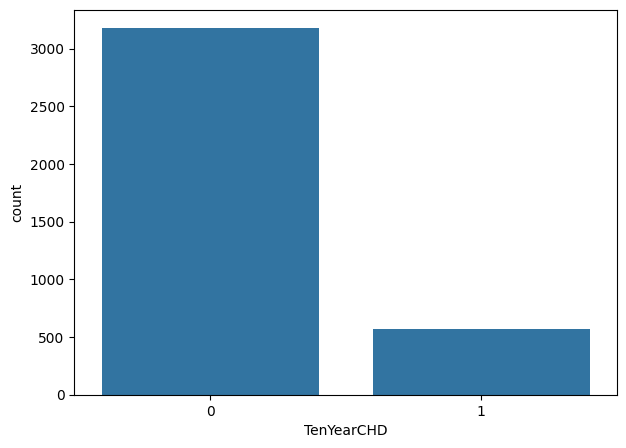

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(x="TenYearCHD", data=dataset)
plt.show()

## Fitting XGBoost Model for Heart Disease Prediction

In [78]:
num_zeros = sum(y_train == 0)
num_ones = sum(y_train == 1)
scale_pos_weight = num_zeros / num_ones

xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)

## Evaluating XGBoost Model

In [79]:
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.5426287744227354


In [80]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       954
           1       0.20      0.68      0.31       172

    accuracy                           0.54      1126
   macro avg       0.55      0.60      0.48      1126
weighted avg       0.79      0.54      0.60      1126



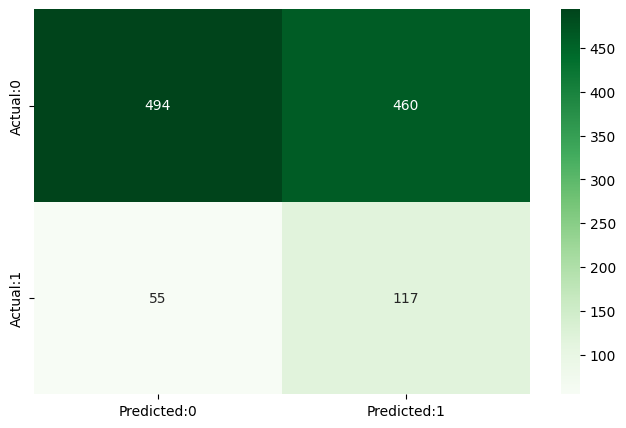

In [81]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()